In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

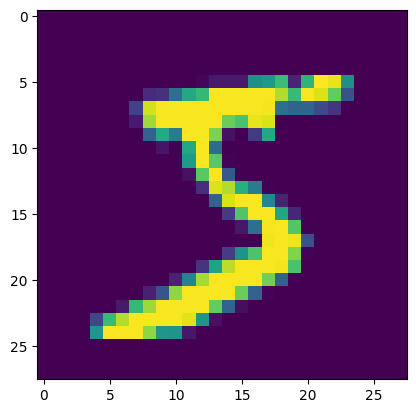

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

encoding the y_train values using one-hot encoding

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

the encoded output

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [16]:
y_cat_train = to_categorical(y_train, num_classes=10)

Scaling the data

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

In [19]:
X_train = X_train/255

In [20]:
X_test = X_test/255

In [21]:
scaled_image = X_train[0]

In [22]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
scaled_image.max()

1.0

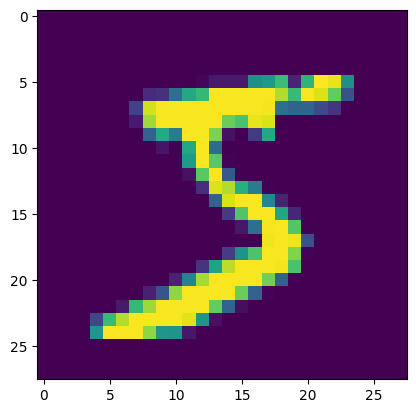

In [24]:
plt.imshow(scaled_image)

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
# batch_size
X_train = X_train.reshape(60000, 28, 28, 1)

In [27]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 

In [30]:
28/4

7.0

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


# output layer -- SOFTMAX --> MULTI_CLASS
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [34]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9174 - loss: 0.2746 - val_accuracy: 0.9813 - val_loss: 0.0539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9853 - val_loss: 0.0417
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0306 - val_accuracy: 0.9856 - val_loss: 0.0446


In [38]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

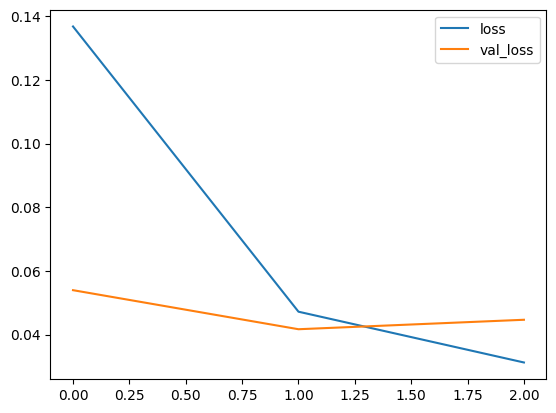

In [42]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

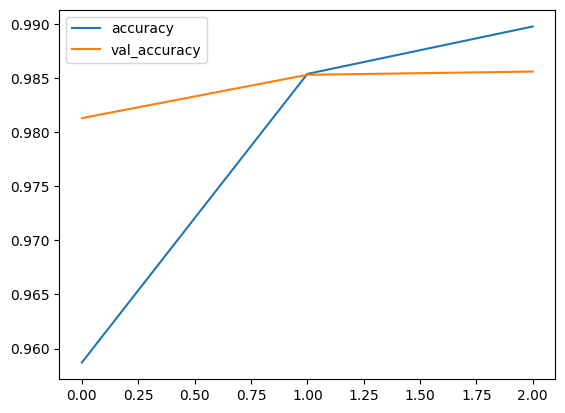

In [43]:
metrics[['accuracy', 'val_accuracy']].plot()

In [44]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.044630542397499084, 0.9855999946594238]

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [53]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


for multiclass classification

In [57]:
predictions = np.argmax(predictions, axis=1)

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



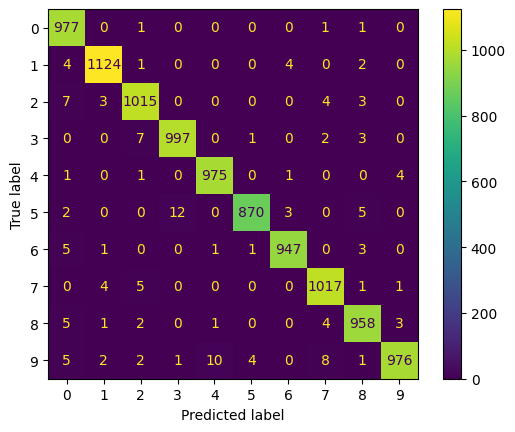

In [60]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
cm.plot()

<Axes: >

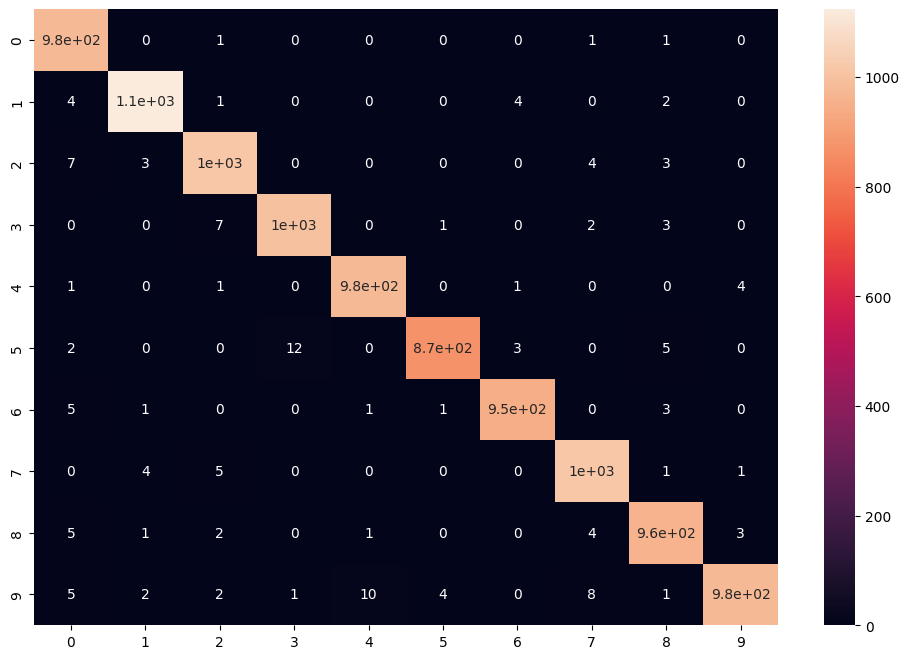

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

Predicting a single image

In [64]:
my_number = X_test[0]

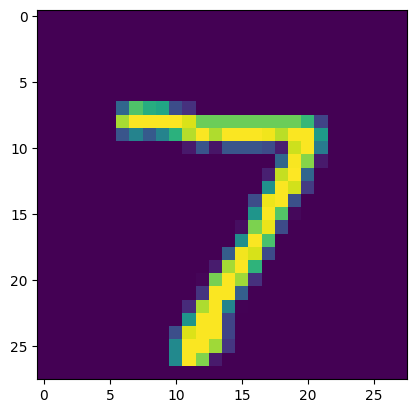

In [65]:
plt.imshow(my_number.reshape(28,28))

In [67]:
my_preds = model.predict(my_number.reshape(1, 28,28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [68]:
predictions = np.argmax(my_preds, axis=1)

In [69]:
predictions

array([7], dtype=int64)